## Movie recommender system

Reference: https://www.nickmccullum.com/python-machine-learning/recommendation-systems-python/

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# item id but no movie titles
raw_data = pd.read_csv('u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])
raw_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [27]:
# movie titles organized by item id
movie_titles_data = pd.read_csv('Movie_Id_Titles')
movie_titles_data.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [28]:
# merge them by item id
merged_data = pd.merge(raw_data, movie_titles_data, on='item_id')
merged_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [29]:
# Each user gave a rating. Now we want average rating per movie sorted
merged_data.groupby('title')['rating'].mean().sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [30]:
# Now we want the rate count per movie sorted
merged_data.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [31]:
# We want a separate dataframe with average rating only per movie
ratings_data = pd.DataFrame(merged_data.groupby('title')['rating'].mean())
ratings_data.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [33]:
# We add the rating count as another column
ratings_data['# of ratings'] = merged_data.groupby('title')['rating'].count()
ratings_data.head()

,rating,# of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='# of ratings', ylabel='Density'>

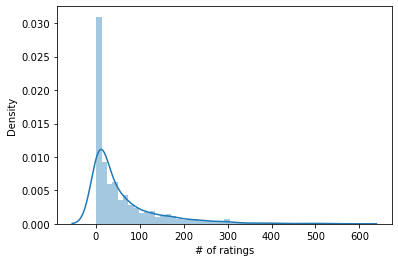

In [34]:
# Plot the density distribution of number of ratings. Most of the movies got very few ratings.
sns.distplot(ratings_data['# of ratings'])

/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

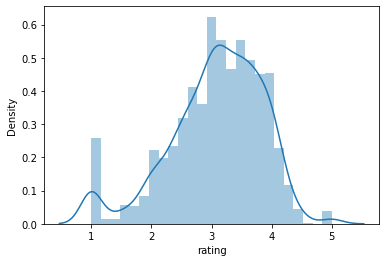

In [35]:
# Plot the rating values. Most of the movies got between 3 and 4.
sns.distplot(ratings_data['rating'])

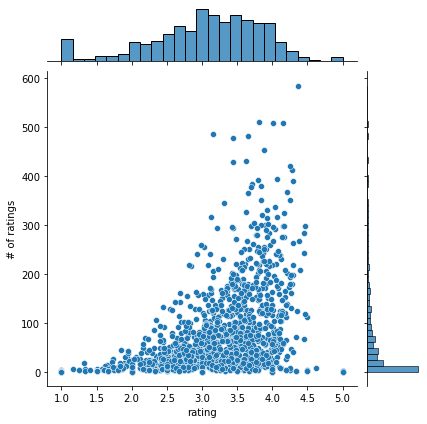

In [36]:
# We want to see the relationship between rating and the number of ratings. The higher the number of ratings, the higher the rating.

sns.jointplot(x = ratings_data['rating'], y = ratings_data['# of ratings'])

In [37]:
# List of ratings per movie per user
ratings_matrix = merged_data.pivot_table(index='user_id',columns='title',values='rating')
print(ratings_matrix)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1

In [38]:
# Select the "toy_story" column. Some users did not rate the movie.
toy_story_user_ratings = ratings_matrix['Toy Story (1995)']
toy_story_user_ratings.head(5)

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [39]:
# Find correlation with 'Return of the Jedi (1983)'
ratings_matrix.corrwith(toy_story_user_ratings)['Return of the Jedi (1983)']

/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


0.18709230116786776

In [41]:
# Create a new dataframe containing the correlation value per movie with Star Wars.
# Seemingly distant movies showing high correlation values is because the same user may have watched liked both.

correlation_with_star_wars = pd.DataFrame(ratings_matrix.corrwith(star_wars_user_ratings))
correlation_with_star_wars.dropna().sort_values(0, ascending = False).head(15)

/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/sophiechoe/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
title,
Stripes (1981),1.0
Guantanamera (1994),1.0
Manny & Lo (1996),1.0
"Quiet Room, The (1996)",1.0
Return of the Jedi (1983),1.0
A Chef in Love (1996),1.0
Cosi (1996),1.0
Mrs. Dalloway (1997),1.0
King of the Hill (1993),1.0


In [42]:
# Add number of ratings to the correlation dataframe
correlation_with_star_wars = correlation_with_star_wars.join(ratings_data['# of ratings'])

In [45]:
# Rename the columns and index by movie title
correlation_with_star_wars.columns = ['Corr. With SW Ratings', '# of Ratings']
correlation_with_star_wars.index.names = ['Movie Title']
correlation_with_star_wars.head(20)

,Corr. With SW Ratings,# of Ratings
Movie Title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41
2 Days in the Valley (1996),0.047452,93
"20,000 Leagues Under the Sea (1954)",0.104229,72
2001: A Space Odyssey (1968),0.085975,259
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5


In [46]:
# Select only the ones with # of ratings greater than 50 and sort in descending order
# Now the movies seem to be more in the same genre
correlation_with_star_wars[correlation_with_star_wars['# of Ratings'] > 50].sort_values('Corr. With SW Ratings', ascending = False).head(10)

,Corr. With SW Ratings,# of Ratings
Movie Title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Manon of the Spring (Manon des sources) (1986),0.483421,58
Sabrina (1954),0.468079,64
Raiders of the Lost Ark (1981),0.467391,420
Giant (1956),0.448247,51
Restoration (1995),0.439437,71
Things to Do in Denver when You're Dead (1995),0.436042,71
